In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from porter import PorterStemmer

## 8.1 Učitavanje stop riječi i postavljanje stemera

Stop riječi se nalaze u datoteci `stopwords.txt`. One se učitaju i skup stop riječi se postave u varijablu `STOPWORDS`.
Stemer je klasa `PorterStemmer` koja se nalazi u modulu `porter.py`. 
Ova klasa ima metodu `stem()`koja prima riječ i vraća korijen te riječi. Metoda `stem()` se postavi u variajablu `STEM`. 

In [2]:
STOPWORDS = set(open("stopwords.txt").read().split())

print("STOP riječi...")
print(STOPWORDS)
print()


STEM = PorterStemmer().stem
print("STEM primjer...")
for w in STOPWORDS:
    s = STEM(w)
    if w != s:
        print(w, "->", s)

STOP riječi...
{'yourselves', 'has', 'couldn', 'does', 'should', 'yourself', 'all', 'its', 'but', 'her', 'hasn', 'how', 'not', 'mightn', "hadn't", 'they', 'and', 's', 'after', 'can', 'will', 'both', 'because', "shouldn't", "you'd", 'ain', 'during', "you've", 'be', 'down', 'herself', 'again', 'having', 'here', 'than', 'd', 'don', 'this', 'few', 'hers', 'my', 'shan', 'no', "weren't", 'any', 't', 'were', 'ourselves', 'then', "isn't", 'we', "you're", 'a', 'when', 'she', 'other', 'for', 'until', 'ma', 'as', 'between', 'their', 'whom', 'wouldn', 'himself', 'myself', "you'll", "couldn't", 'once', 'of', "needn't", 're', 'against', 'theirs', 'was', 'you', 'am', 'before', 'only', 'didn', "doesn't", 'shouldn', 'with', 'o', "that'll", "don't", 'mustn', "she's", "mightn't", 'those', 'now', 'or', 'itself', 'ours', 'just', 'under', 'm', 'wasn', "aren't", 'which', 'out', 'aren', 'won', 'own', 'if', 'doesn', 'above', 'haven', 'did', 'very', 'are', "won't", 'i', 'so', 'y', "didn't", 'been', 'by', 'from'

## 8.2. Učitavanje podataka

U datotekama `tweets_positive.txt` i `tweets_negative.txt` se u svakom redu nalazi po jedan pozitivan, odnosno negativan tweet. Nakon učitavanja tweetova u varijablama `positive_tweets` i `negative_tweets` slijedi njihova podjela na tweetove za treniranje i testiranje u omjeru 80:20.

Na kraju, varijable `train` i `test` sadrže parove oblika `(tweet, 1)` ako je sentimenta tweeta pozitivan i `(tweet, 0)` ako je sentiment tweeta negativan.

Radi tabličnog prikaza podataka, korišten je `pandas` modul i njegova klasa `DataFrame` koja može primiti listu podataka `data` i nazive stupaca `columns`.

In [3]:
positive_tweets = open('tweets_positive.txt').read().split("\n")
negative_tweets = open('tweets_negative.txt').read().split("\n")
print("Broj pozitivnih tweetova:", len(positive_tweets))
print("Broj negativnih tweetova:", len(positive_tweets))

n_positive, n_negative = len(positive_tweets) * 80 // 100, len(negative_tweets) * 80 // 100

train_pos, test_pos = positive_tweets[:n_positive], positive_tweets[n_positive:]
train_neg, test_neg = negative_tweets[:n_negative], negative_tweets[n_negative:]

train = [(tweet, 1) for tweet in train_pos] + [(tweet, 0) for tweet in train_neg]
test = [(tweet, 1) for tweet in test_pos] + [(tweet, 0) for tweet in test_neg]

print("Broj tweetova za treniranje", len(train))
print("Broj tweetova za testiranje", len(test))

pd.DataFrame(data=train, columns=["tweet", "sentiment"])

Broj pozitivnih tweetova: 5000
Broj negativnih tweetova: 5000
Broj tweetova za treniranje 8000
Broj tweetova za testiranje 2000


,tweet,sentiment
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,1
1,@Lamb2ja Hey James! How odd :/ Please call our...,1
2,@DespiteOfficial we had a listen last night :)...,1
3,@97sides CONGRATS :),1
4,yeaaaah yippppy!!! my accnt verified rqst has...,1
...,...,...
7995,Amelia didnt stalk my twitter :(,0
7996,"oh, i missed the broadcast. : (",0
7997,i really can't stream on melon i feel useless :-(,0
7998,I need to stop looking at old soccer pictures :(,0


## 8.3 Predobrada teksta

Svaki tweet će se 
* pretvoriti u male znakove

i zatim će se uz pomoć regularnih izraza
* izbacit će se hiperveze
* izbacit će se html oznake kao &amp; i sl.,
* izbacit će se nazivi korisnika oblika `@user` i hash tagovi oblika `#tag`
* odvojit će se interpunkcije na početku i na kraju tokena

zatim će se razbiti na riječi i izbaciti stop riječi, te će se provesti stemanje svake riječi.
Za rezultat se dobije lista riječi.

Zatim će se uz pomoć `pandas.DataFrame` prikazati nekoliko pozitivnih i negativnih tweetova prije i poslije obrade.

In [4]:
def text_process(txt):
    txt = txt.lower()
    txt = re.sub(r'https?://.*', '', txt)
    txt = re.sub(r"&\S+;", "", txt)
    txt = re.sub(r'[@#]\S+', '', txt)
    txt = re.sub(r"(\W*)(\w*)(\W+)", r"\1 \2 \3", txt)

    words = [word for word in txt.split() if word not in STOPWORDS]
    words = [STEM(w) for w in words]
    return words

pd.DataFrame([(1, doc, text_process(doc)) for doc in positive_tweets[:5]] + 
             [(0, doc, text_process(doc)) for doc in negative_tweets[:5]] , columns=["Sentiment", "Tweet", "Processed"])

,Sentiment,Tweet,Processed
0,1,#FollowFriday @France_Inte @PKuchly57 @Milipol...,"[top, engag, member, commun, week, :)]"
1,1,@Lamb2ja Hey James! How odd :/ Please call our...,"[hey, jame, !, odd, :/, pleas, call, contact, ..."
2,1,@DespiteOfficial we had a listen last night :)...,"[listen, last, night, :), bleed, amaz, track, ..."
3,1,@97sides CONGRATS :),"[congrat, :)]"
4,1,yeaaaah yippppy!!! my accnt verified rqst has...,"[yeaaaah, yippppi, !!!, accnt, verifi, rqst, s..."
5,0,hopeless for tmr :(,"[hopeless, tmr, :(]"
6,0,Everything in the kids section of IKEA is so c...,"[everyth, kid, section, ikea, cute, ., shame, ..."
7,0,@Hegelbon That heart sliding into the waste ba...,"[heart, slide, wast, basket, ., :(]"
8,0,"“@ketchBurning: I hate Japanese call him ""bani...","[“, hate, japanes, call, "", bani, "", :(, :(”]"
9,0,"Dang starting next week I have ""work"" :(","[dang, start, next, week, "", work, "", :(]"


## 8.4 Prebrojavanje pozitivnih i negativnih riječi

U rječniku `FREQS` će se za svaki ključ oblika (riječ, sentiment) čuvati broj pojavljivanja te riječi u tweetovima istog sentimenta. Zatim se uz pomoć `pandas.DataFrame` prikazuje nekoliko najfrekventnijih riječi.

In [5]:
def make_freqs(tweets):
    freqs = {}
    for tweet, sentiment in tweets:
        words = text_process(tweet)
        for w in words:
            w = STEM(w)
            freqs[w, sentiment] = freqs.get((w, sentiment), 0) + 1
    return freqs

FREQS = make_freqs(train + test)

data = [(w, s, FREQS[w, s]) for w, s in sorted(FREQS, key=FREQS.get, reverse=True)]

# pd.set_option('display.min_rows', 40)
pd.DataFrame(data, columns=["word", "sentiment", "frequency"])


,word,sentiment,frequency
0,:(,0,3830
1,:),1,3155
2,',0,1736
3,',1,1281
4,.,1,1230
...,...,...,...
12300,jaebum,0,1
12301,ahmad,0,1
12302,maslan,0,1
12303,hull,0,1


## 8.5. Izvlačenje osobina

Funkcija `features_extraction()` prima tekst tweeta kojeg pretvara u vektor osobina oblika

`[broj pozitivnih riječi, broj negativnih riječi, 1]`

Broj 1 je, radi jednostavnosti, stavljen na kraju jer će se on množiti s pristranošću `b`.

In [6]:
def features_extraction(txt):
    words = text_process(txt)
    x = np.array([0, 0, 1])
    for word in words:
        x[0] += FREQS.get((word, 1), 0)
        x[1] += FREQS.get((word, 0), 0)

    assert x.shape == (3,)
    return x

tweet = train[0][0]
x = features_extraction(tweet)

print(tweet)
print(x)

#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
[3326   71    1]


Sada možemo tweetove prikazati u koordinatnom sustavu.
Koordinata x će biti broj pozitivnih riječi u tweetu, odnosno y će biti broj negativnih riječi u tweetu.

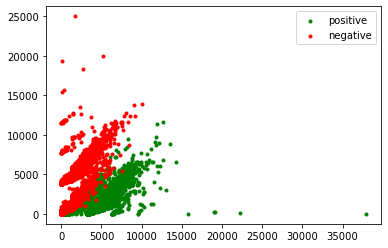

In [7]:
posx, posy = [], []
negx, negy = [], []
for tweet, sentiment in train + test:
    x, y, _ = features_extraction(tweet)
    if sentiment == 1:
        posx.append(x)
        posy.append(y)
    else:
        negx.append(x)
        negy.append(y)
    
plt.scatter(posx, posy, color="green", marker=".", label="positive")
plt.scatter(negx, negy, color="red", marker=".", label="negative")
plt.legend()


    

## 8.6. Učenje opadanjem gradijenta

Sada se može pristupiti učenju koje se provodi nad podacima za treniranje. Prvo je definira aktivacijska funkcija `sigmoid()`.

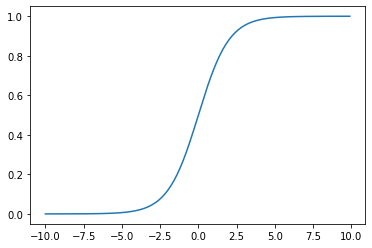

In [8]:
def sigmoid(x): 
    return 1 / (1 + np.exp(-x))

x = np.arange(-10, 10, 0.1)
plt.plot(x, sigmoid(x))

Zatim je definirana funkcija opadanja gradijenta `gradient_descent()` koja ima sljedeće parametre:
* x - m vektora oblika $[x_1, x_2, 1]$ kojima je predstavljen tweet
* y - m skalara gdje 1 predstavlja pozitivan sentiment, a 0 negativan sentiment
* alpha - rata učenja
* num_iters - broj iteracija

Izlaz ove funkcije je 
* `loss`- lista gubitaka kod svake iteracije
* `theta` - naučeni parametri modela, odnosno u ovom slučaju $\Theta = [w_1, w_2, b]$

Koraci algoritma opadanja gradijenta su:
* u `m` se postavi broj tweetova, a u `n` broj osobina svakog tweeta (u ovom slučaju, $n = 3$)
* inicijalno se stvori `theta` ($\Theta = [0, 0, 0]$)
* lista gubitaka `loss` je inicijalno prazna
* za svaku iteraciju od `num_iters` iteracija:
    * `z` je vektor koji sadrži skalarni produkt od `theta`i svakog vektora iz `x` ($\Theta \cdot x = w_1 x_1 + w_2 x_2 + b$)
    * nad svakim dobivenim skalarom se primjeni aktivacijska funkcija `sigmoid()` ($\hat{y} = \sigma(\Theta \cdot x)$)
    * izračuna se gubitak `J` i doda u listu `loss` ( $J= - \frac{1}{m} \sum{[y log(\hat{y}) + (1 - y)log(1-\hat{y})]}$ )
    * izračuna se gradijent `grad` od `theta` ($\frac{\partial{\Theta}}{\partial{w_i}}=( \hat{y_i} - y_i) x_i $ )
    * promijeni se `theta` temeljem rate učenja i gradijenta ( $\Theta = \Theta - \frac{\alpha}{m} \nabla \Theta$  ) 
* vrati se `loss` i `theta`
    

In [12]:
def svm(x, y, alpha, learn_rate, num_iters):
    m, n = x.shape
    y = np.where(y == 0, -1, 1)
    
    THETA = np.zeros(n)
    loss = []
    for epoch in range(num_iters):
        print(".", end="")
        J = 0
        for i in range(m):
            if y[i]* np.dot(x[i], THETA) < 1:
                # ERROR - so regularization
                J += 1
                THETA = THETA + learn_rate * (np.dot(x[i], y[i]) + (-2  * alpha * THETA))
            else:
                THETA = THETA + learn_rate * (-2 * alpha * THETA)
        loss.append(J)
    
    return loss, THETA

train_x = np.array([features_extraction(tweet) for tweet, _ in train])
train_y = np.array([sentiment for _, sentiment in train])

loss, theta = svm(train_x, train_y, alpha = 0.01, learn_rate=0.1, num_iters=300)

............................................................................................................................................................................................................................................................................................................

THETA:  [ 2.50272611e-05 -2.05683876e-01 -4.53874905e-02]
[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1

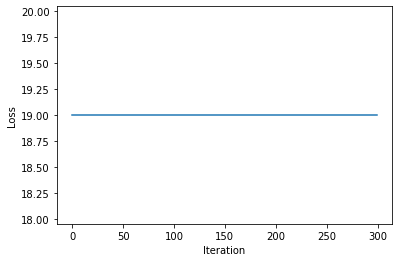

In [14]:
print("THETA: ", theta)



plt.plot(loss)
plt.xlabel("Iteration")
plt.ylabel("Loss")
print(loss)

In [9]:
def gradient_descent(x, y, alpha, num_iters):        
    m, n = x.shape
    theta = np.zeros(n)
    loss = []
    for i in range(0, num_iters):
        z = np.dot(theta, x.T)
        yh = sigmoid(z)
        assert z.shape == (m, )        
        assert yh.shape == (m, )

        J = -(1 / m) * (np.dot(y, np.log(yh)) + np.dot((1 - y), np.log(1 - yh))) 
        loss.append(J)
        grad = np.dot(x.T, yh - y)
        theta = theta - (alpha / m) * grad

    return loss, theta



Prvo se pripreme matrica `X` i vektor `Y`. 

Svaki redak matrice `X` je vektor osobina tweeta $[x_1, x_2, 1]$ dok je svaki skalar u vektoru `Y` ili 1 ili 0 ovisno o tome je li tweet pozitivan ili negativan. Parovi tweetova i pripadni sentiment se uzimaju iz `train`.

Zatim se pokrene `gradient_descent()` za `X` i `Y` uz ratu učenja $\alpha = 10^{-8}$ i broj iteracija 1500.
Nakon učenja se ispiše `theta` i nacrta se graf gubitka za svaku iteraciju.


THETA:  [ 1.33211828e-03 -1.22686183e-03  1.59567628e-07]


Text(0, 0.5, 'Loss')

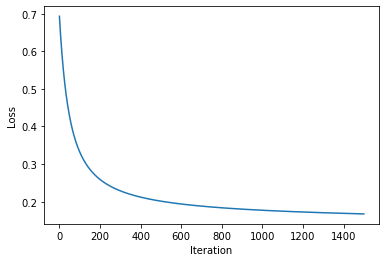

In [10]:
train_x = np.array([features_extraction(tweet) for tweet, _ in train])
train_y = np.array([sentiment for _, sentiment in train])

loss, theta = gradient_descent(train_x, train_y, alpha=1e-8, num_iters=1500)
print("THETA: ", theta)

plt.plot(loss)
plt.xlabel("Iteration")
plt.ylabel("Loss")

## 8.7 Učenje stohastičkim opadanjem gradijenta

Kod stohastičkog opadanja gradijenta potrebno je znati veličinu grupe `batch_size`. Temeljem ovog parametra određuje se broj slučajno odabranih vektora iz `x` i `y` kod svake iteracije.

Nad takvim vektorima se u nastavku iteracije provode koraci kao i kod opadanja gradijenta.

In [11]:
def stohastic_gradient_descent(x, y, alpha, num_iters, batch_size):
    m, n = x.shape
    theta = np.zeros(n)
    loss = []
    for i in range(0, num_iters):
        row_is = np.random.choice(m, size=batch_size, replace=False)
        batch_x = x[row_is, :]
        batch_y = y[row_is]
        
        z = np.dot(theta, batch_x.T)
        batch_yh = sigmoid(z)
        J = -(1 / batch_size) * (np.dot(batch_y, np.log(batch_yh)) + np.dot((1 - batch_y), np.log(1 - batch_yh)))     
        loss.append(J)        
        theta = theta - (alpha / batch_size) * np.dot(batch_x.T, batch_yh - batch_y)

    return loss, theta

Osim rate učenja $\alpha$ i broja iteracija 1500, postavlja se parametar `batch_size`

THETA:  [ 1.33008220e-03 -1.22874541e-03  1.57237841e-07]


Text(0, 0.5, 'Loss')

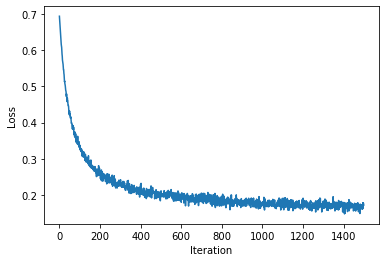

In [12]:
loss, theta = stohastic_gradient_descent(train_x, train_y, alpha=1e-8, num_iters=1500, batch_size=1024)

print("THETA: ", theta)

plt.plot(loss)
plt.xlabel("Iteration")
plt.ylabel("Loss")

## 8.8 Evaluacija

Sada za svaki tweet možemo predviditi sentiment. Stoga je definirana funkcija `predict()` koja će za dani `tweet` i model `theta` odrediti broj iz segmenta $[0, 1]$. Ako je broj bliže 0, onda smatramo da je sentiment 0, odnosno negativan. Međutim, ako je broj bliže 1, onda se radi o pozitivnom sentimentu.

In [17]:
np.sign(-3)

-1

In [15]:
def predict(tweet, theta):
    x = features_extraction(tweet)
    y_pred = np.sign(np.dot(x, theta))
    return y_pred

pd.DataFrame(data=[(tweet, sentiment, predict(tweet, theta)) for tweet, sentiment in test],
             columns=["tweet", "sentiment", "prediction"])


,tweet,sentiment,prediction
0,"Bro:U wan cut hair anot,ur hair long Liao bo M...",1,-1.0
1,@heyclaireee is back! thnx God!!! i'm so happy :),1,-1.0
2,@BBCRadio3 thought it was my ears which were m...,1,-1.0
3,@HumayAG 'Stuck in the centre right with you. ...,1,-1.0
4,Happy Friday :-) http://t.co/iymPIlWXFY,1,-1.0
...,...,...,...
1995,I wanna change my avi but uSanele :(,0,-1.0
1996,MY PUPPY BROKE HER FOOT :(,0,-1.0
1997,where's all the jaebum baby pictures :((,0,-1.0
1998,But but Mr Ahmad Maslan cooks too :( https://t...,0,-1.0


Temeljem testnih podataka se izvuku vektori `test_x`i `test_y` slično kako su se odredili `train_x` i `train_y` za treniranje.

Evaluacija započinje izradom tablice zabune temeljem podataka za testiranje. Funkcija `test_contingency()` prima:
* `x` vektore tweetova,
* `y` njihove točne sentimente `y` i 
* `theta` naučeni model.

Za izlaz od `test_contingency()` se dobiva - po redu:
* `tp` - broj stvarno pozitivnih tweetova,
* `fp` - broj lažno pozitivnih tweetova,
* `fn` - broj lažno negativnih tweetova i
* `tn` - broj istinito negativnih tweetova.

Funkcija `test_evaluate()` za dobivenu tablicu zabune `tp`, `fp`, `fn` i `tn` se određuje - po redu:
* `acc` - točnost,
* `p` - preciznost,
* `o` - odziv,
* `f1` - F1 mjera.



In [15]:
test_X = np.array([features_extraction(tweet) for tweet, _ in test])
test_Y = np.array([sentiment for _, sentiment in test])

def test_contingency(x, y, theta):
    fx =  sigmoid(np.dot(theta, x.T))
    assert fx.shape == y.shape
    yh = np.array([1 if z > 0.5 else 0 for z in fx])

    tp = fp = fn = tn = 0
    for yi, yhi in zip(y, yh):
        if yhi == 1:
            if yi == 1:
                tp += 1
            else:
                fp += 1
        else:
            if yi == 1:
                fn += 1
            else:
                tn += 1

    return tp, fp, fn, tn

def test_evaluate(tp, fp, fn, tn):
    a = (tp + tn) / (tp + fp + fn + tn)
    p = tp / (tp + fp)
    r = tp / (tp + fn)
    f1 = 2 * p * r / (p + r)
    
    return a, p, r, f1
    

test_x = np.array([features_extraction(tweet) for tweet, _ in test])
test_y = np.array([sentiment for _, sentiment in test])

tp, fp, fn, tn = test_contingency(test_x, test_y, theta)
a, p, r, f1 = test_evaluate(tp, fp, fn, tn)

print("TP: ", tp) 
print("FP: ", fp) 
print("FN: ", fn) 
print("TN: ", tn) 
print() 
print(f"Accuracy   : {a:.4f}")
print(f"Precission : {p:.4f}")
print(f"Recall     : {r:.4f}")
print(f"F1         : {f1:.4f}")

TP:  969
FP:  44
FN:  31
TN:  956

Accuracy   : 0.9625
Precission : 0.9566
Recall     : 0.9690
F1         : 0.9627


## 8.9. Greške

Na poslijetku, mogu se pregledati tweetovi kojima model nije dobro predvidio sentiment. Analizom takvih tweetova je moguće odrediti dodatne osobine ili promjeniti postojeće osobine opisane u funkciji `features_extraction()`.

Funkcija `test_errors()` prima:
* `x` vektore tweetova,
* `y` njihove točne sentimente `y` i 
* `theta` naučeni model.

a vraća `pd.DataFrame` tablicu sa stupcima:
* i - broj pozicije tweeta i sentimenta,
* Tweet - tekst tweeta
* Processed - predobrađeni tekst tweeta u obliku liste pojavnica.
* Predict - rezultat predviđanja,
* Sentiment - stvarni sentiment,
* Error - vrsta greške, koja može biti lažno pozitivna ili lažno negativna.


In [19]:
def test_errors(x, y, theta):
    data = []
    fx =  sigmoid(np.dot(theta, x.T))
    yh = np.array([1 if z > 0.5 else 0 for z in fx])
    for i, (yi, yhi) in enumerate(zip(y, yh)):
        if yi != yhi:
            tweet, sentiment = test[i]
            data.append((i, tweet, text_process(tweet), predict(tweet, theta), yi, "False positive" if yhi == 1 else "False negative"))
    return pd.DataFrame(data, columns=["i", "Tweet", "Processed", "Predict", "Sentiment", "Error"])

pd.set_option('display.max_rows', 100)

test_errors(test_x, test_y, theta).sort_values(by="Predict")

,i,Tweet,Processed,Predict,Sentiment,Error
8,155,Movie 'Key of Life' (Japanese Version) https:/...,"[movi, ', key, life, ', (, japanes, version, )]",0.318070,1,False negative
7,151,"@Clareyh Yeah, it's a classy look :-). I've se...","[yeah, ,, ', classi, look, :-)., ', seen, peop...",0.356472,1,False negative
6,148,It's not like it hurt my feelings or anything ...,"[', like, hurt, feel, anyth, right, ??, :)))))...",0.356631,1,False negative
20,521,Ok good night I wish troye wasn't ugly and I m...,"[ok, good, night, wish, troy, ', ugli, met, to...",0.373760,1,False negative
30,985,Who's still awake ?:))),"[', still, awak, ?:)))]",0.373918,1,False negative
13,225,@heyoppar @Zain9898 @bemybelief @hetthuocchua ...,"[', gonna, anoth, one, final, :)))))]",0.386376,1,False negative
1,31,That awkward moment when your name is 'Akarsha...,"[awkward, moment, name, ', akarshan, ',, end, ...",0.392441,1,False negative
16,315,@wontanim yep we're all trash af im from ind...,"[yep, ', trash, af, im, indonesia, hbu, ?, :-))]",0.394906,1,False negative
11,199,"@storpey don't die, you're actually pretty ent...","[', die, ,, ', actual, pretti, entertain, :p]",0.395620,1,False negative
27,736,@PXC_Macavity In case you didn't.. it's on my ...,"[case, ', .., ', facebook, wall, ., :p]",0.402247,1,False negative
